In [1]:
import numpy as np
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential, save_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2

Using TensorFlow backend.


In [2]:
path = './preprocessed_new/'

In [3]:
gestures = os.listdir(path)

In [4]:
dict_labels = {
    'A': 1,
    'B': 2,
    'C':3,
    'D':4,
    'E':5,
    'F':6,
    'G':7,
    'H':8,
    'I':9,
    'K':10,
    'L':11,
    'M':12,
    'N':13,
    'O':14,
    'P':15,
    'Q':16,
    'R':17,
    'S':18,
    'T':19,
    'U':20,
    'V':21,
    'W':22,
    'X':23,
    'Y':24,
    
}

In [5]:
x, y = [], []
for ix in gestures:
    images = os.listdir(path + ix)
    for cx in images:
        img_path = path + ix + '/' + cx
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        img = img/255.0
        x.append(img)
        y.append(dict_labels[ix])

In [6]:
X = np.array(x)
Y = np.array(y)
Y = np_utils.to_categorical(Y)


In [7]:
Y.shape

(28800, 25)

In [8]:
categories = Y.shape[1]

In [9]:
X, Y = shuffle(X, Y, random_state=0)

In [10]:
X.shape

(28800, 50, 50, 1)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [12]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(17280, 50, 50, 1) (11520, 50, 50, 1)
(17280, 25) (11520, 25)


In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(50,50,1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(categories, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 16)        9232      
_________________________________________________________________
flatten_2 (Flatten)          (None, 7056)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7056)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                176425    
Total para

In [16]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [17]:
history = model.fit(X_train, Y_train, batch_size=16, epochs=5, validation_data=[X_test, Y_test])

Train on 17280 samples, validate on 11520 samples
Epoch 1/5
17280/17280 [==============================] - 69s 4ms/step - loss: 0.3781 - acc: 0.8951 - val_loss: 0.1112 - val_acc: 0.9701
Epoch 2/5
17280/17280 [==============================] - 69s 4ms/step - loss: 0.0889 - acc: 0.9746 - val_loss: 0.0551 - val_acc: 0.9847
Epoch 3/5
17280/17280 [==============================] - 66s 4ms/step - loss: 0.0533 - acc: 0.9837 - val_loss: 0.0468 - val_acc: 0.987834 -
Epoch 4/5
17280/17280 [==============================] - 63s 4ms/step - loss: 0.0393 - acc: 0.9877 - val_loss: 0.0393 - val_acc: 0.9904
Epoch 5/5
17280/17280 [==============================] - 61s 4ms/step - loss: 0.0314 - acc: 0.9909 - val_loss: 0.0981 - val_acc: 0.9768


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

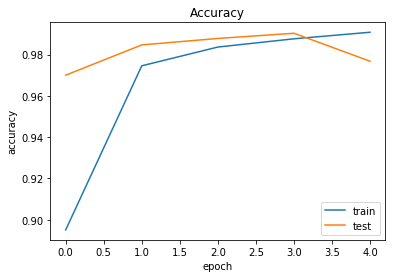

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [20]:
model.save('./new_model2.h5')

In [21]:
test_data = os.listdir('./test_data/')

In [25]:
x, y = [], []
for ix in test_data:
    images = os.listdir('./test_data/' + ix)
    for cx in images:
        img_path = path + ix + '/' + cx
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        img = img/255.0
        x.append(img)
        y.append(dict_labels[ix])

In [26]:
X_t = np.array(x)
y_t = np.array(y)
Y_t = np_utils.to_categorical(y_t)

In [27]:
X_t.shape

(4800, 50, 50, 1)

In [30]:
y_pred = model.predict(X_t)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(Y_t, y_pred.round())

0.98125